In [229]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Getting the Data

Pull Data

In [230]:
url = "https://raw.githubusercontent.com/oganm/dnddata/master/data-raw/dnd_chars_all.json"

df_json = pd.read_json(url)

if df_json.shape[0] < df_json.shape[1]:
    df_json = df_json.transpose()

Displaying Pulled Data

In [231]:
df_json.head()

,ip,finger,name,race,background,date,class,level,levelGroup,feats,...,AC,attributes,alignment,skills,weapons,spells,castingStat,choices,location,hash
thirsty_davinci Sorcerer 13|Cleric 1,[],[ed15f9d],"{'hash': ['ee1e382c'], 'alias': ['thirsty_davi...","{'race': ['Hill Dwarf'], 'processedRace': ['Dw...",[Guild Member - Justice],[2022-08-23 13:02:11],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[14],{},"[Fey Touched, War Caster, Metamagic Adept]",...,[10],"{'Str': [9], 'Dex': [11], 'Con': [20], 'Int': ...","{'alignment': [''], 'processedAlignment': ['']...","[Arcana, Religion, Intimidation]","{'Crossbow, light': {'weapon': ['Crossbow, lig...","{'Alarm*1': {'spell': ['Alarm'], 'level': ['1'...",[Cha],"{'metamagic': ['Twinned Spell', 'Subtle Spell'...","{'country': ['Canada'], 'countryCode': ['CA']}",[fe3ed6570067d2cd808bcee0a4396824]
thirsty_davinci Sorcerer 13|Cleric 1.1,[],[ed15f9d],"{'hash': ['ee1e382c'], 'alias': ['thirsty_davi...","{'race': ['Hill Dwarf'], 'processedRace': ['Dw...",[Guild Member - Justice],[2022-08-23 12:43:25],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[14],{},[],...,[10],"{'Str': [9], 'Dex': [11], 'Con': [18], 'Int': ...","{'alignment': [''], 'processedAlignment': ['']...","[Arcana, Religion, Intimidation]","{'Crossbow, light': {'weapon': ['Crossbow, lig...","{'Alarm*1': {'spell': ['Alarm'], 'level': ['1'...",[Cha],"{'metamagic': ['Twinned Spell', 'Subtle Spell'...","{'country': ['Canada'], 'countryCode': ['CA']}",[aa656cef94740b1da714d82782d8a8c4]
cool_bhabha Fighter 13,[6b5d3f4],[d922658],"{'hash': ['f1f6ff43'], 'alias': ['cool_bhabha']}","{'race': ['Human'], 'processedRace': ['Human']}",[Noble],[2022-08-22 07:57:09],"{'Fighter': {'class': ['Fighter'], 'subclass':...",[13],{},[Heavy Armor Master],...,[21],"{'Str': [20], 'Dex': [12], 'Con': [19], 'Int':...","{'alignment': ['CG'], 'processedAlignment': ['...","[History, Insight, Perception, Persuasion]","{'Longsword +1': {'weapon': ['Longsword +1'], ...",{'Prestidigitation*0': {'spell': ['Prestidigit...,[Int],{'fighting style': ['Defense']},"{'country': ['United States'], 'countryCode': ...",[04b9abba9ce759ef13319c520bf0eb69]
vigilant_mcclintock Sorcerer 3|Druid 2,[9b7218f],[b5d19a0],"{'hash': ['f92bdd74'], 'alias': ['vigilant_mcc...","{'race': ['Fallen Aasimar'], 'processedRace': ...",[Outlander],[2022-08-22 05:12:53],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[5],{},[],...,[16],"{'Str': [8], 'Dex': [10], 'Con': [14], 'Int': ...","{'alignment': ['Caltico Neutro'], 'processedAl...","[Athletics, Arcana, Insight, Survival]","{'Dagger': {'weapon': ['Dagger'], 'processedWe...",{'Burning Hands*1': {'spell': ['Burning Hands'...,[Cha],"{'metamagic': ['Transmuted Spell', 'Seeking Sp...","{'country': ['Brazil'], 'countryCode': ['BR']}",[ba92372c716a832e03e866447cb2d102]
vigilant_mcclintock Sorcerer 3|Druid 2.1,[9b7218f],[b5d19a0],"{'hash': ['f92bdd74'], 'alias': ['vigilant_mcc...","{'race': ['Fallen Aasimar'], 'processedRace': ...",[Outlander],[2022-08-22 05:07:21],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[5],{},[],...,[16],"{'Str': [8], 'Dex': [10], 'Con': [14], 'Int': ...","{'alignment': ['Caltico Neutro'], 'processedAl...","[Athletics, Arcana, Insight, Survival]","{'Dagger': {'weapon': ['Dagger'], 'processedWe...",{'Burning Hands*1': {'spell': ['Burning Hands'...,[Cha],"{'metamagic': ['Transmuted Spell', 'Seeking Sp...","{'country': ['Brazil'], 'countryCode': ['BR']}",[2f4a637dd42b9aa945abf870fe34edcf]


In [232]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10894 entries, thirsty_davinci Sorcerer 13|Cleric 1 to admiring_payne Rogue 2
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ip           10894 non-null  object
 1   finger       10894 non-null  object
 2   name         10894 non-null  object
 3   race         10894 non-null  object
 4   background   10894 non-null  object
 5   date         10894 non-null  object
 6   class        10894 non-null  object
 7   level        10894 non-null  object
 8   levelGroup   10894 non-null  object
 9   feats        10894 non-null  object
 10  HP           10894 non-null  object
 11  AC           10894 non-null  object
 12  attributes   10894 non-null  object
 13  alignment    10894 non-null  object
 14  skills       10894 non-null  object
 15  weapons      10894 non-null  object
 16  spells       10894 non-null  object
 17  castingStat  10894 non-null  object
 18  choices      10894 

Ignoring Redundant Data and Filtering Data containing redundancy

In [233]:
df_json.drop(['ip', 'finger','date', 'location', 'hash', 'choices','weapons', 'name', 'feats'], axis = 1, inplace = True)

In [234]:
df_json.head()

,race,background,class,level,levelGroup,HP,AC,attributes,alignment,skills,spells,castingStat
thirsty_davinci Sorcerer 13|Cleric 1,"{'race': ['Hill Dwarf'], 'processedRace': ['Dw...",[Guild Member - Justice],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[14],{},[146],[10],"{'Str': [9], 'Dex': [11], 'Con': [20], 'Int': ...","{'alignment': [''], 'processedAlignment': ['']...","[Arcana, Religion, Intimidation]","{'Alarm*1': {'spell': ['Alarm'], 'level': ['1'...",[Cha]
thirsty_davinci Sorcerer 13|Cleric 1.1,"{'race': ['Hill Dwarf'], 'processedRace': ['Dw...",[Guild Member - Justice],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[14],{},[133],[10],"{'Str': [9], 'Dex': [11], 'Con': [18], 'Int': ...","{'alignment': [''], 'processedAlignment': ['']...","[Arcana, Religion, Intimidation]","{'Alarm*1': {'spell': ['Alarm'], 'level': ['1'...",[Cha]
cool_bhabha Fighter 13,"{'race': ['Human'], 'processedRace': ['Human']}",[Noble],"{'Fighter': {'class': ['Fighter'], 'subclass':...",[13],{},[140],[21],"{'Str': [20], 'Dex': [12], 'Con': [19], 'Int':...","{'alignment': ['CG'], 'processedAlignment': ['...","[History, Insight, Perception, Persuasion]",{'Prestidigitation*0': {'spell': ['Prestidigit...,[Int]
vigilant_mcclintock Sorcerer 3|Druid 2,"{'race': ['Fallen Aasimar'], 'processedRace': ...",[Outlander],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[5],{},[34],[16],"{'Str': [8], 'Dex': [10], 'Con': [14], 'Int': ...","{'alignment': ['Caltico Neutro'], 'processedAl...","[Athletics, Arcana, Insight, Survival]",{'Burning Hands*1': {'spell': ['Burning Hands'...,[Cha]
vigilant_mcclintock Sorcerer 3|Druid 2.1,"{'race': ['Fallen Aasimar'], 'processedRace': ...",[Outlander],"{'Sorcerer': {'class': ['Sorcerer'], 'subclass...",[5],{},[34],[16],"{'Str': [8], 'Dex': [10], 'Con': [14], 'Int': ...","{'alignment': ['Caltico Neutro'], 'processedAl...","[Athletics, Arcana, Insight, Survival]",{'Burning Hands*1': {'spell': ['Burning Hands'...,[Cha]


Adding Features

In [235]:
df = pd.DataFrame()

#processing race
def processRace(row):
    return row["race"]['race'][0], row["race"]['processedRace'][0]
    
df["Sub Race"], df["Base Race"] = zip(*df_json.apply(processRace, axis = 1))

#processing class
def processClass(row):
    classes = list(row["class"].keys())
    if len(classes) < 2:
        return str(classes[0])
    return None

df["Class"] = df_json.apply(processClass, axis = 1).reset_index()[0]

#background
def processBackground(row):
    return row["background"][0]
    
df["Background"] = df_json.apply(processBackground, axis = 1).reset_index()[0]

#process single line stuff
df["Level"] = df_json.apply(lambda x : x["level"][0], axis = 1).reset_index()[0]

df["HP"] = df_json.apply(lambda x : x["HP"][0], axis = 1).reset_index()[0]

df["AC"] = df_json.apply(lambda x : x["AC"][0], axis = 1).reset_index()[0]

def hp_per_level(row):
    return row["HP"][0] / row["level"][0]

df["HP per Level"] = df_json.apply(hp_per_level, axis = 1).reset_index()[0]

def num_spells(row):
    return len(row["spells"])

df["num_spells"] = df_json.apply(num_spells, axis = 1).reset_index()[0]

stats = {"Str": "Strength", "Dex": "Dexterity", "Con": "Constitution", "Int": "Intelligence", "Wis": "Wisdom", "Cha": "Charisma"}

#processing stats
def processAttributes(row):
    atr = row["attributes"]
    return atr["Str"][0], atr["Dex"][0], atr["Con"][0], atr["Int"][0], atr["Wis"][0], atr["Cha"][0]

df["Strength"], df["Dexterity"], df["Constitution"], df["Intelligence"], df["Wisdom"], df["Charisma"] = zip(*df_json.apply(processAttributes, axis = 1))

df["Casting Stat"] = df_json.apply(lambda x : stats[x["castingStat"][0]], axis = 1).reset_index()[0]

In [236]:
df["Class"].unique()

array([None, 'Fighter', 'Bard', 'Ranger', 'Druid', 'Rogue', 'Cleric',
       'Warlock', 'Monk', 'Sorcerer', 'Barbarian', 'Paladin', 'Wizard',
       'Artificer', 'Blood Hunter', 'Mystic', 'Revised Ranger',
       'Gunslinger', 'Battle Clown', 'Crafting Commoner', 'commoner'],
      dtype=object)

In [237]:
df = df[~df['Class'].isin([None, 'Artificer', 'Blood Hunter', 'Mystic', 'Revised Ranger', 'Gunslinger', 'Battle Clown', 'Crafting Commoner', 'commoner'])]
df['Class']
class_list = df['Class'].unique().tolist()
class_list

['Fighter',
 'Bard',
 'Ranger',
 'Druid',
 'Rogue',
 'Cleric',
 'Warlock',
 'Monk',
 'Sorcerer',
 'Barbarian',
 'Paladin',
 'Wizard']

In [238]:
df.dropna().drop_duplicates().reset_index(drop = True)

,Sub Race,Base Race,Class,Background,Level,HP,AC,HP per Level,num_spells,Strength,Dexterity,Constitution,Intelligence,Wisdom,Charisma,Casting Stat
0,Human,Human,Fighter,Noble,13,140,21,10.769231,17,20,12,19,14,11,10,Intelligence
1,Variant,Half-Elf,Bard,Entertainer,1,10,13,10.000000,0,10,16,14,12,8,16,Charisma
2,Kenku,Kenku,Ranger,Guild Member - Spycraft,20,94,16,4.700000,15,13,16,13,15,15,14,Wisdom
3,Fallen Aasimar,Aasimar,Druid,Far Traveler,20,116,13,5.800000,27,14,15,12,11,17,11,Wisdom
4,Human,Human,Fighter,Folk Hero,4,41,15,10.250000,0,14,16,15,11,13,11,Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9440,Gray-Elf,Elf,Cleric,Noble,6,45,17,7.500000,21,10,18,14,12,18,18,Wisdom
9441,Half-Elf,Half-Elf,Ranger,Mercenary Veteran,3,32,16,10.666667,0,10,16,14,13,13,10,Wisdom
9442,Dragonborn,Dragonborn,Paladin,Noble,6,58,19,9.666667,7,20,13,15,10,12,16,Charisma
9443,Meadowguard,,Bard,Acolyte,1,10,14,10.000000,7,8,16,13,11,13,16,Charisma


removing 145 entries with HP / level < 2.75 and HP / level > 15.666666666666666


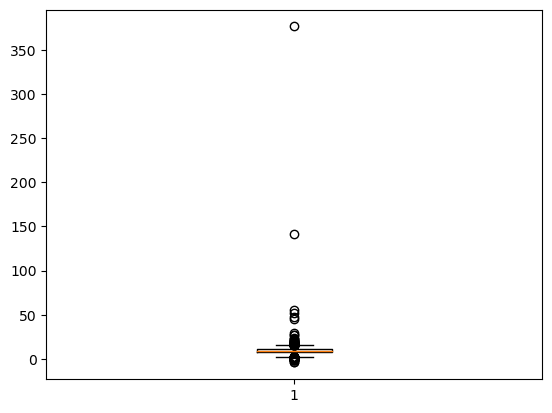

In [239]:
hp_per_level = df["HP per Level"]

boxplot = plt.boxplot(hp_per_level)
whiskers = [x.get_ydata()[1] for x in boxplot['whiskers']] # gives the 1.5*iqr whisker boundaries

n_small_outliers = len(hp_per_level[hp_per_level < whiskers[0]])
n_large_outliers = len(hp_per_level[hp_per_level > whiskers[1]])
n_outliers = n_small_outliers + n_large_outliers

print(f'removing {n_outliers} entries with HP / level < {whiskers[0]} and HP / level > {whiskers[1]}')
no_artificer_df = df[hp_per_level >= whiskers[0]]
no_artificer_df = df[hp_per_level <= whiskers[1]]

Exploratory Data Analysis

Class Distribution

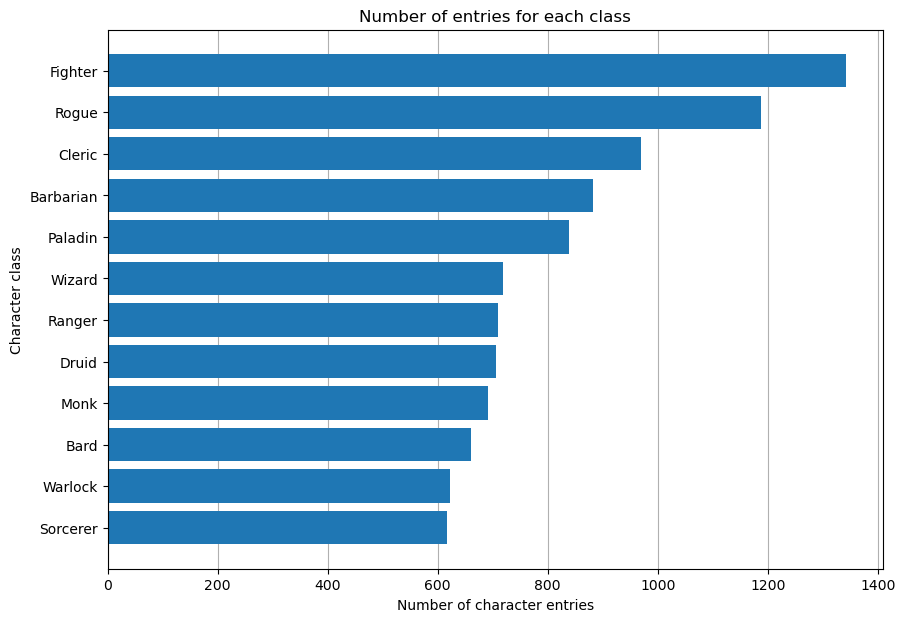

In [240]:
classes = df['Class'].value_counts().index
class_counts = df['Class'].value_counts().values

fig = plt.figure(figsize=[10,7])
ax = plt.subplot(111)

ax.barh(classes, class_counts)
ax.set_xlabel('Number of character entries')
ax.set_ylabel('Character class')
ax.set_title('Number of entries for each class')
ax.invert_yaxis()
ax.xaxis.grid(True)
ax.set_axisbelow(True)

Attribute Distributions

          Strength       Wisdom  Constitution     Charisma  Intelligence  \
count  9945.000000  9945.000000   9945.000000  9945.000000   9945.000000   
mean     12.840221    13.119457     14.310106    13.053796     11.875314   
std       3.991381     3.122919      2.515392     3.649301      3.052164   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%      10.000000    11.000000     13.000000    10.000000     10.000000   
50%      12.000000    13.000000     14.000000    13.000000     12.000000   
75%      16.000000    15.000000     16.000000    16.000000     14.000000   
max     103.000000   100.000000    103.000000    99.000000     99.000000   

         Dexterity  
count  9945.000000  
mean     14.541880  
std       3.138542  
min       1.000000  
25%      12.000000  
50%      14.000000  
75%      16.000000  
max     101.000000  


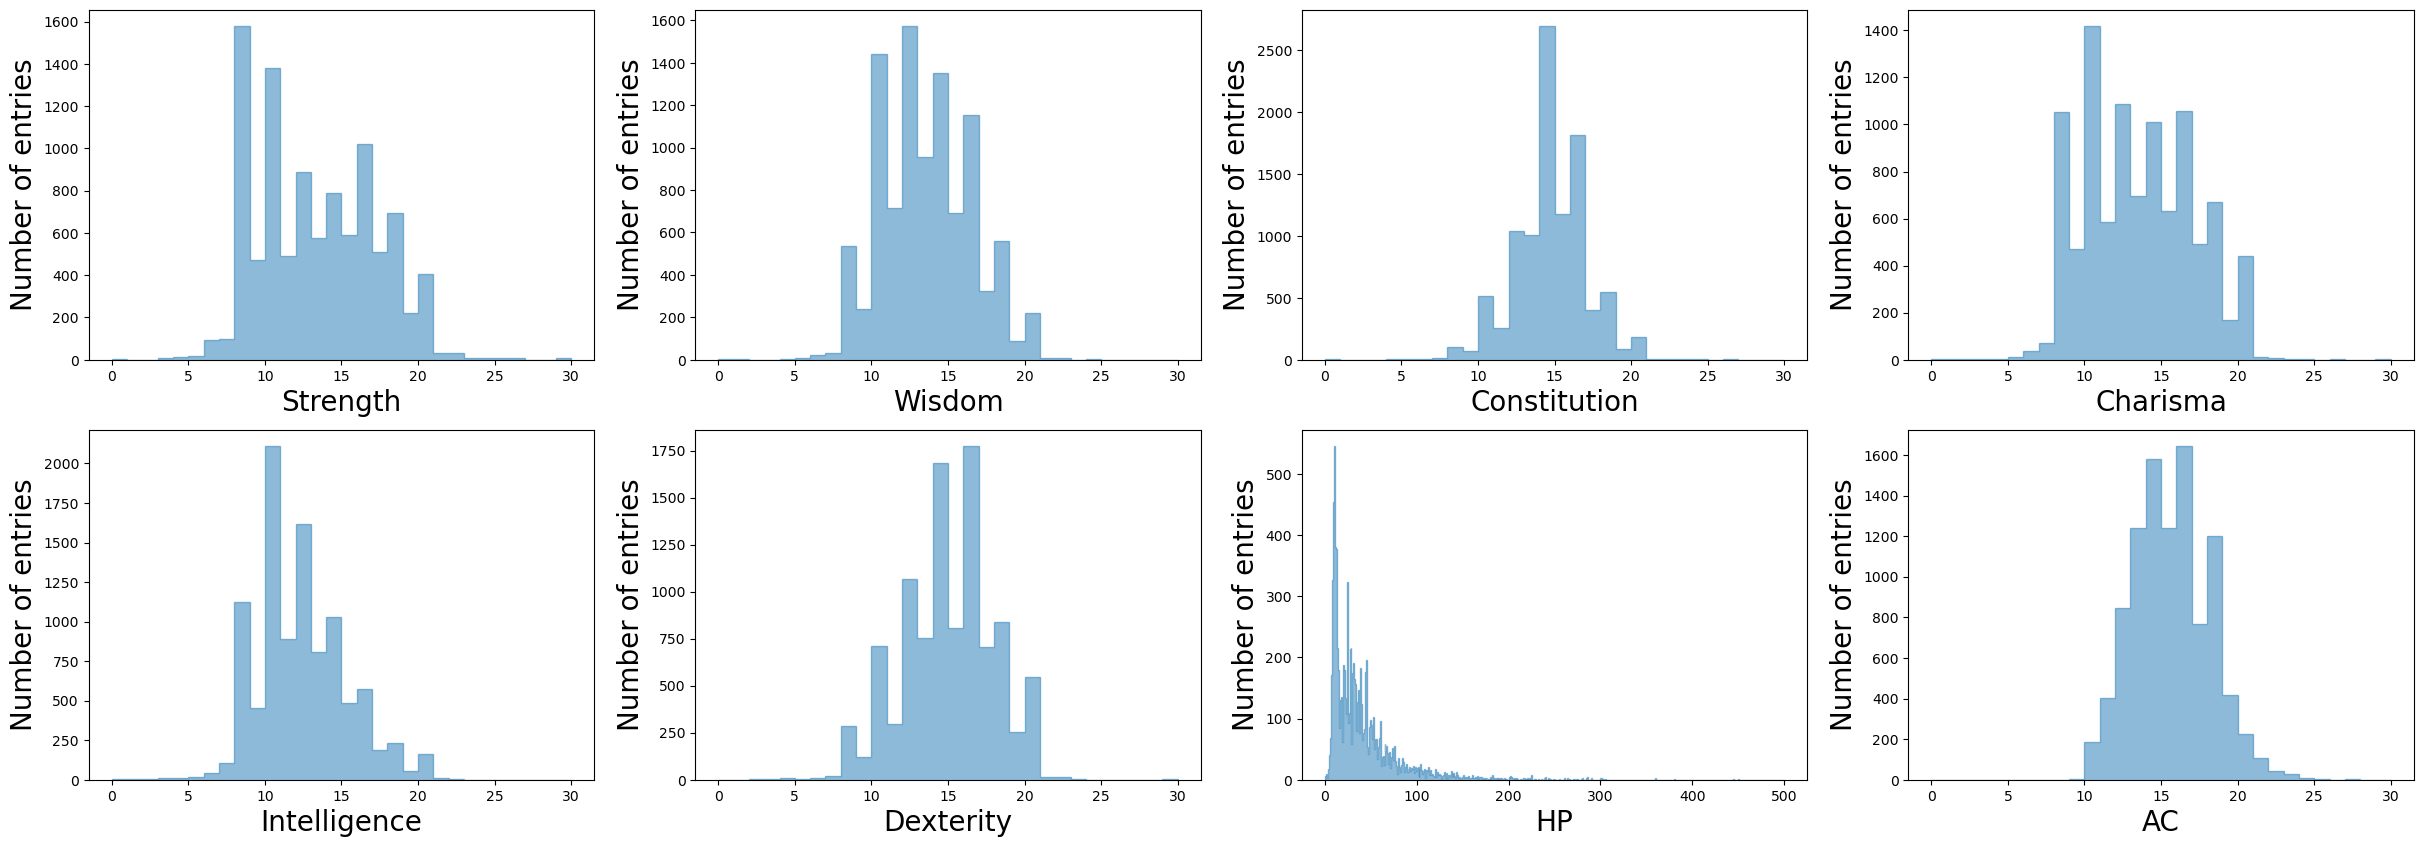

In [241]:
attributes = ['Strength', 'Wisdom', 'Constitution', 'Charisma', 'Intelligence', 'Dexterity']
attributes_data = df[attributes]

print(attributes_data.describe())

if 0:
    # 2d hists
    for iattribute, attribute in enumerate(attributes):
        plt.hist(attributes_data[attribute], bins=50, range=(0,50))
        plt.xlabel(attribute)
        plt.yscale('log')
        plt.show()

        for iattribute2, attribute2 in enumerate(attributes):
            if iattribute2 > iattribute:
                plt.hist2d(attributes_data[attribute], attributes_data[attribute2], bins=50, range=[(0,50),(0,50)])
            plt.xlabel(attribute)
            plt.ylabel(attribute2)
            plt.show() 
    atts = []

    # violin plots
    for att in stats:
        atts.append(df[att])

    fig = plt.figure(figsize=[10,7])
    ax = plt.subplot(111)
    pos = [1, 2, 3, 4, 5, 6]

    ax.violinplot(atts, positions=pos, showextrema=False)
    ax.set_ylim(0,25)
    ax.set_xticks(pos)
    ax.set_xticklabels(attributes)
    
    for cls in class_list:
        cls_df = df[df[cls].notnull()]
        atts = []
        for att in attributes:
            atts.append(cls_df[att])
        plt.hist(atts, histtype='step', fill=False, bins=30, range=(0,30))
        plt.legend(attributes)
        plt.title(cls.split('.')[0])
        plt.show()

fig, axs = plt.subplots(2,4, figsize=(30, 10))
derp = [(a,b) for a in (0,1) for b in (0,1,2,3)]
for iatt, att in enumerate(attributes + ['HP','AC']):
    n = 30
    if att == 'HP':
        n = 500
    axs[derp[iatt][0], derp[iatt][1]].hist(df[att], histtype='step', fill=True, alpha=0.5, bins=n, range=(0,n))
    axs[derp[iatt][0], derp[iatt][1]].set_xlabel(att, fontsize=20)
    axs[derp[iatt][0], derp[iatt][1]].set_ylabel('Number of entries', fontsize=20)

plt.show()

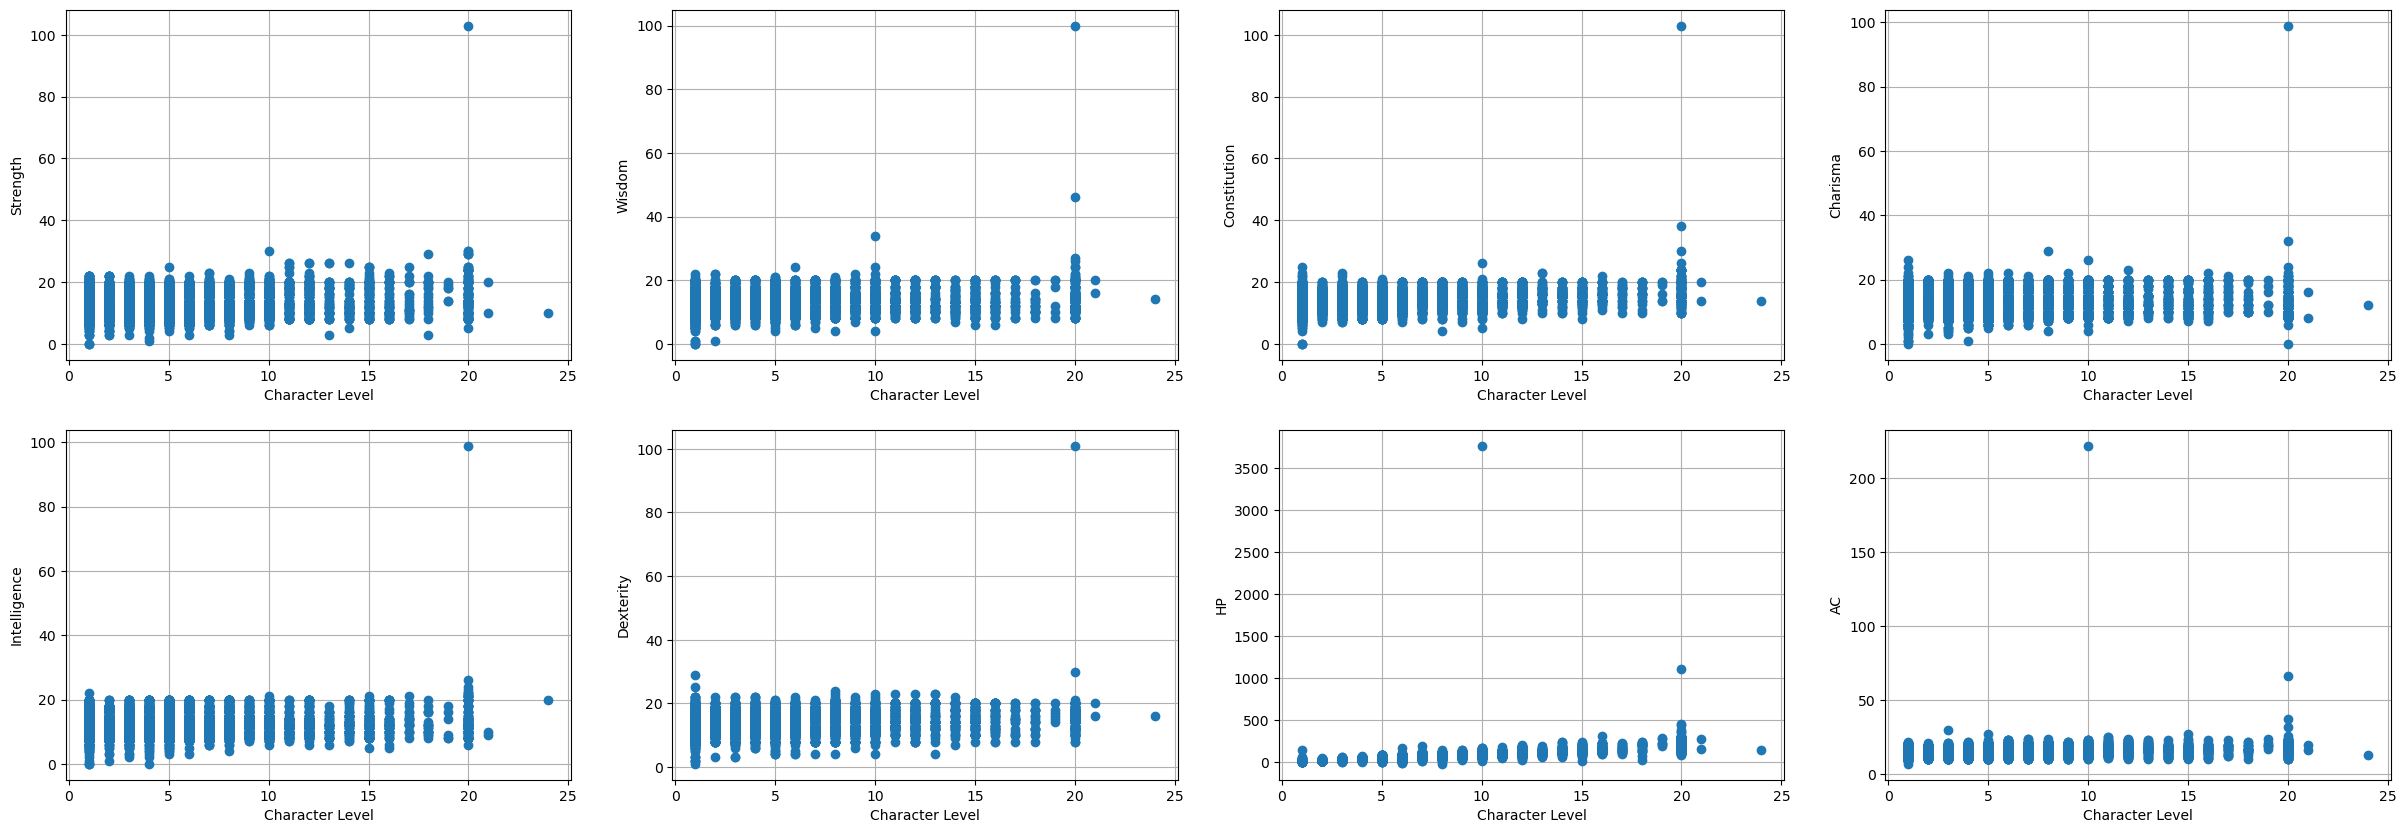

In [242]:
fig, axs = plt.subplots(2,4, figsize=(30, 10))
derp = [(a,b) for a in (0,1) for b in (0,1,2,3)]
for iatt, att in enumerate(attributes + ['HP','AC']):
    axs[derp[iatt][0], derp[iatt][1]].scatter(df['Level'], df[att])
    axs[derp[iatt][0], derp[iatt][1]].set_xlabel('Character Level')
    axs[derp[iatt][0], derp[iatt][1]].set_ylabel(att)
    axs[derp[iatt][0], derp[iatt][1]].grid(True)
    axs[derp[iatt][0], derp[iatt][1]].set_axisbelow(True)
plt.show()

HP Distributions

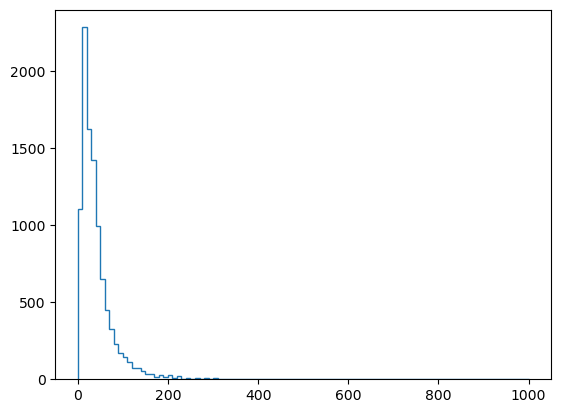

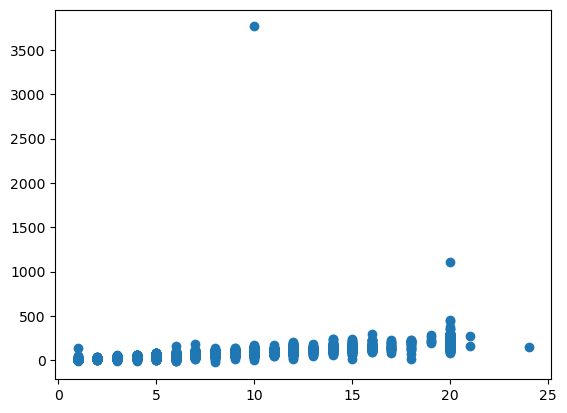

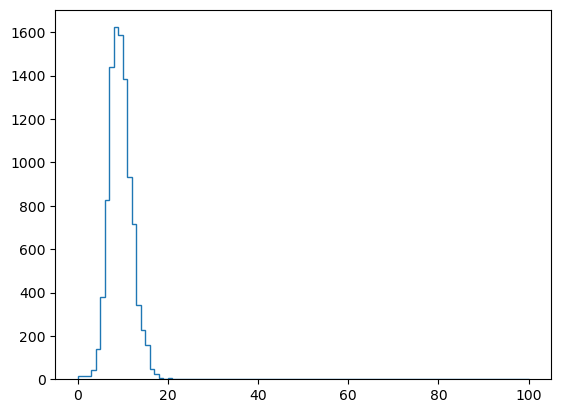

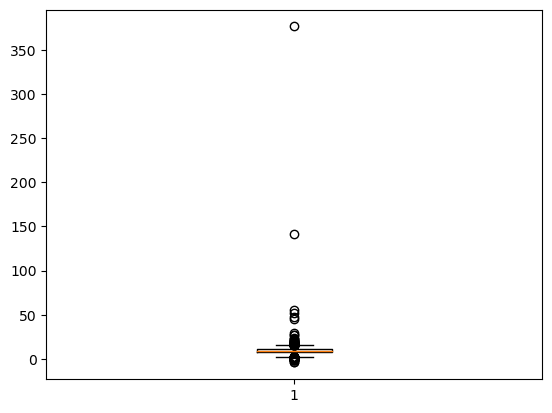

In [243]:
plt.hist(df['HP'], histtype='step', fill=False, bins=100, range=(0,1000))
plt.show()

plt.scatter(df['Level'], df['HP'])
plt.show()

# hp correlated with level, consider hp / level

hp_per_level = df['HP'].divide(df['Level'])

plt.hist(hp_per_level, histtype='step', fill=False, bins=100, range=(0,100))
plt.show()

plt.boxplot(hp_per_level)
plt.show()

AC Distribution

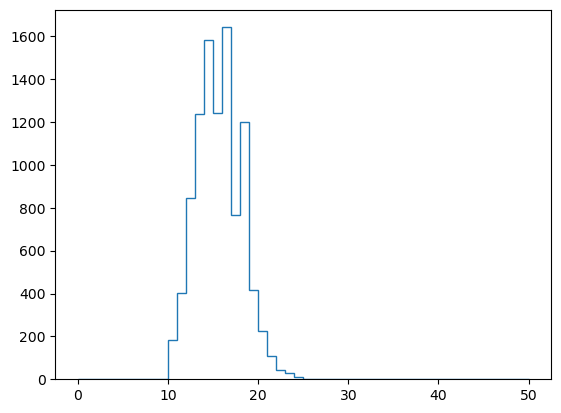

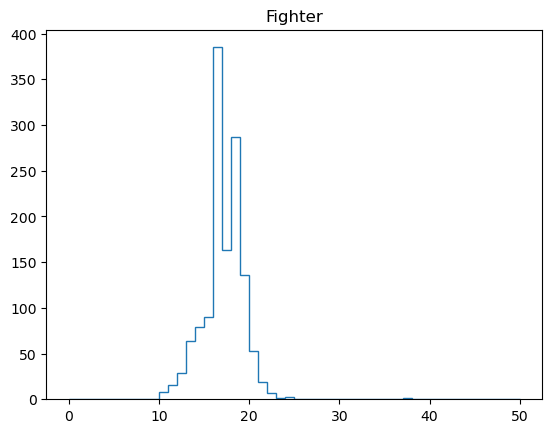

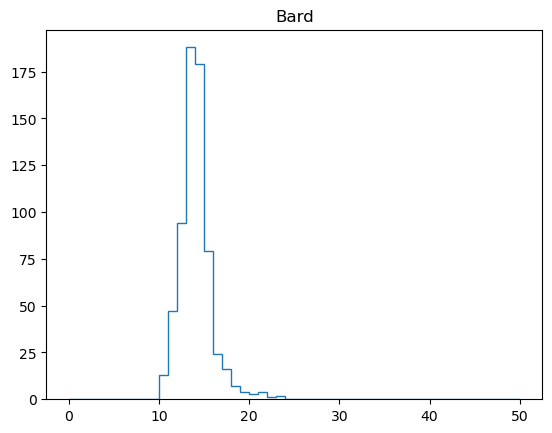

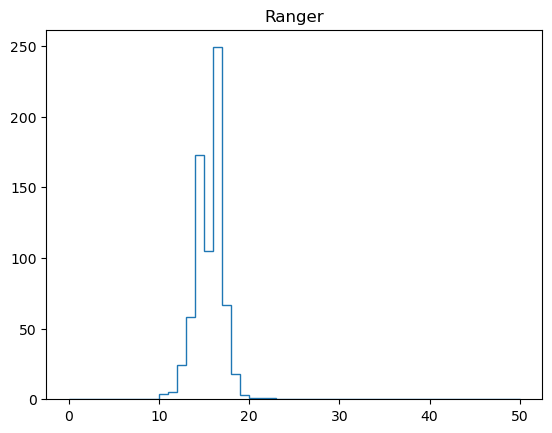

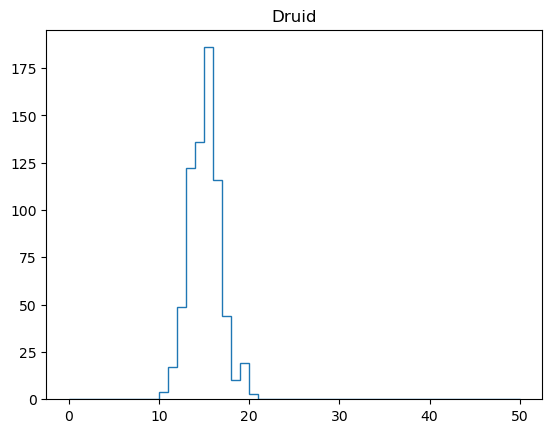

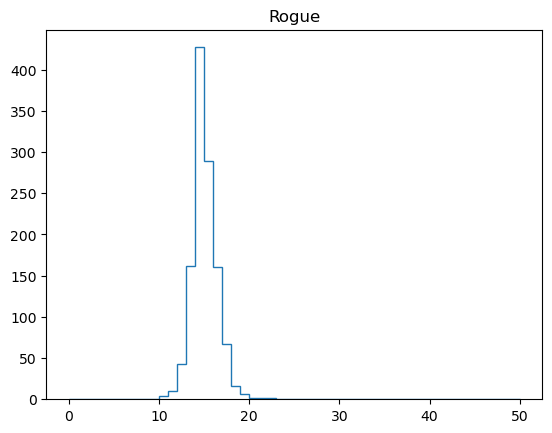

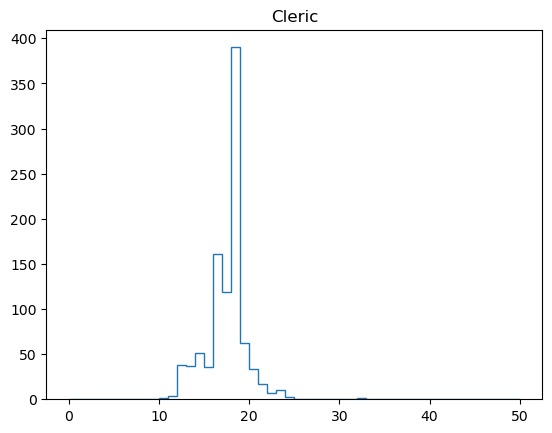

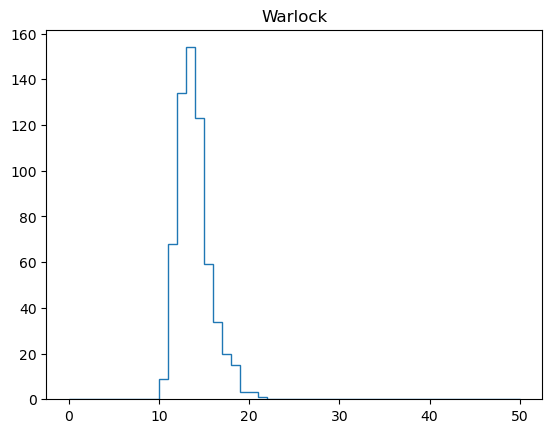

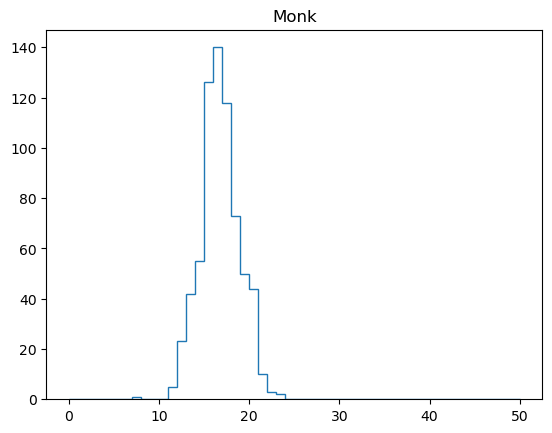

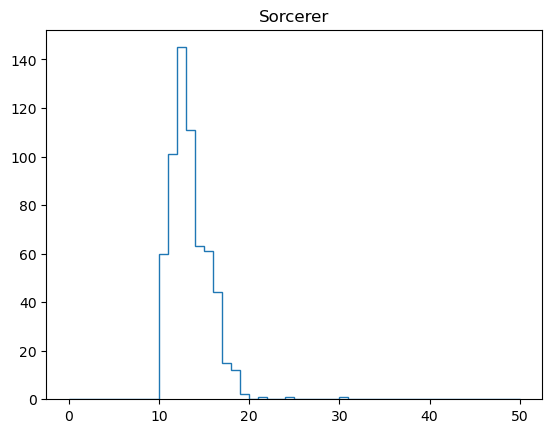

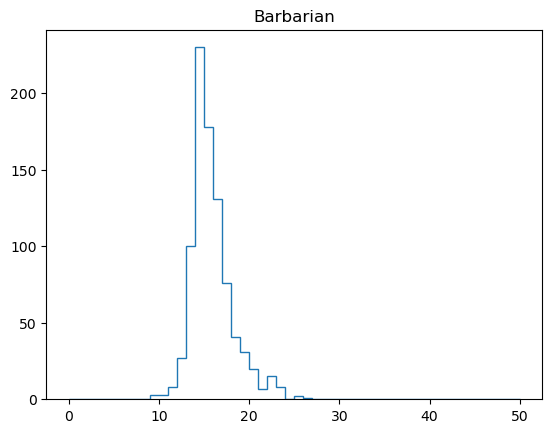

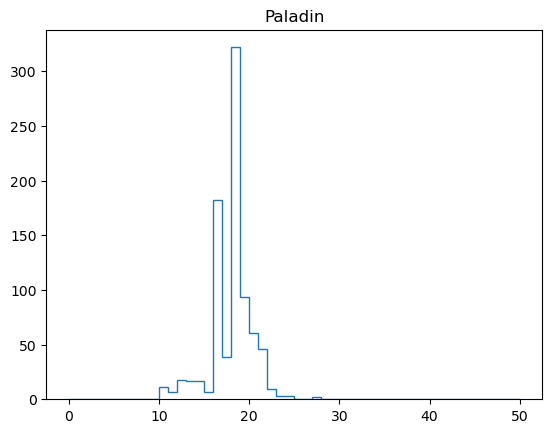

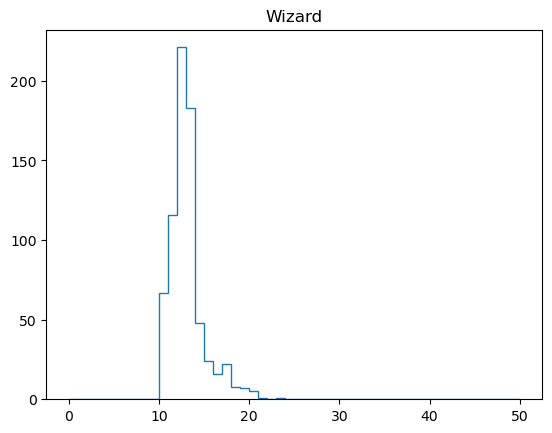

In [244]:
plt.hist(df['AC'], histtype='step', fill=False, bins=50, range=(0,50))
plt.show()

# for each class
for cls in df['Class'].unique():
  cls_df = df[df['Class'] == cls]
  plt.hist(cls_df['AC'], histtype='step', fill=False, bins=50, range=(0,50))
  plt.title(cls.split('.')[0])
  plt.show()

Outlier Exploration

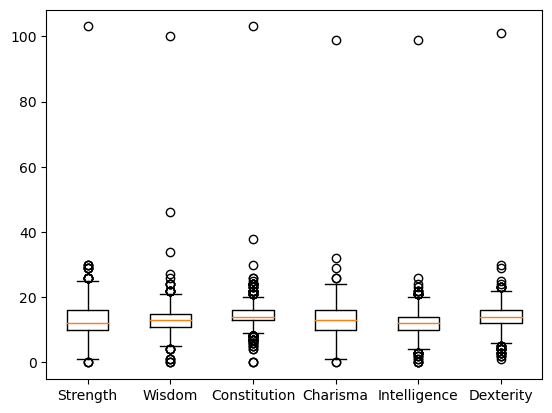

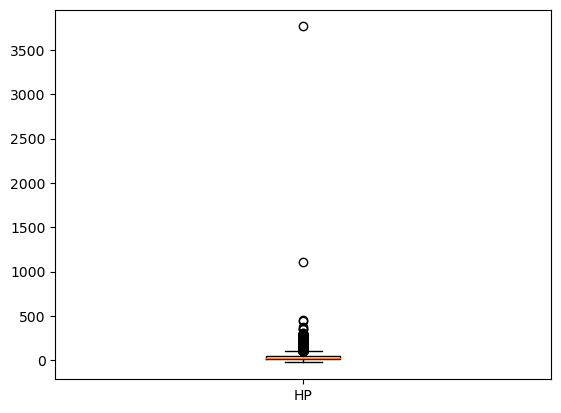

[-24.0, 105.0]


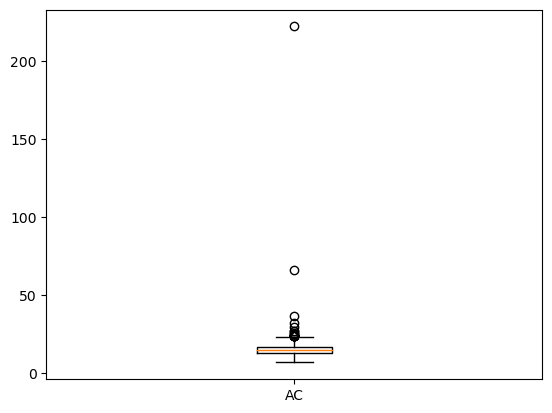

[7.0, 23.0]


In [245]:
attributes_data = attributes_data.apply(pd.to_numeric, errors='coerce')

attributes_data.describe()

# IQR / boxplot outlier analysis
att_dfs = []
for att in attributes:
  att_dfs.append(attributes_data[att])

plt.boxplot(att_dfs, labels=attributes)
plt.show()

for col in "HP", "AC":
  zzz = plt.boxplot(df[col], labels=[col])
  plt.show()
  x = [item.get_ydata()[1] for item in zzz['whiskers']]
  print(x)

Correlations & Relationships

In [246]:
castingStat_list = df['Casting Stat'].unique().tolist()
castingStat_list

['Intelligence', 'Charisma', 'Wisdom', 'Strength', 'Constitution', 'Dexterity']

<Axes: >

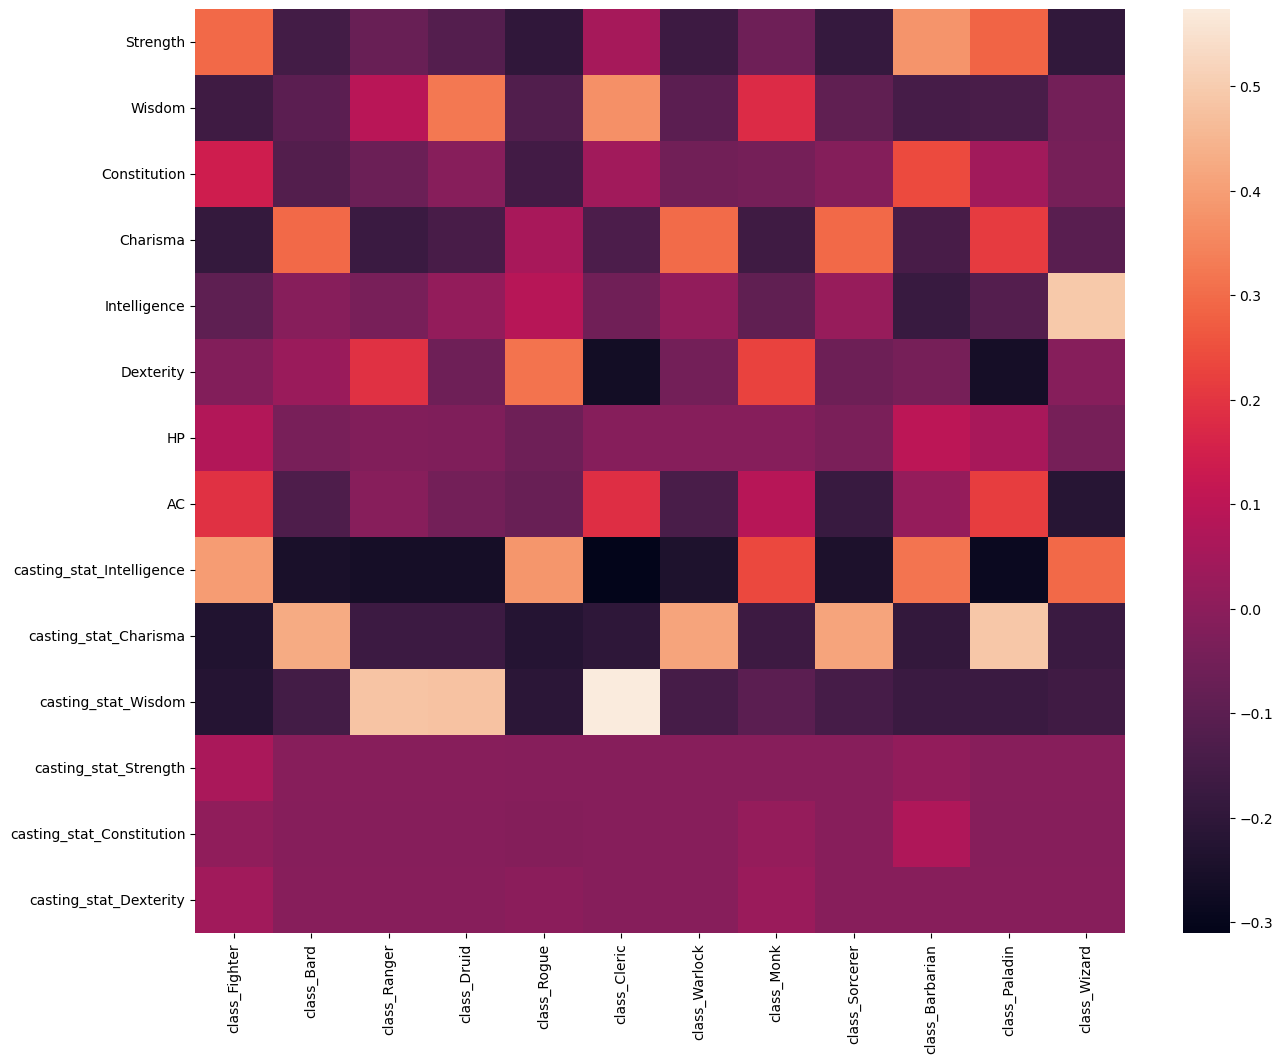

In [247]:
# to identify which features we should include or may give us info

plt.figure(figsize=(15,12))

# correlation between different attributes
# con and str seam to have a decent correlation, but the rest dont

class_type = pd.get_dummies(df["Class"], prefix='class')
df = pd.concat([df, class_type], axis = 1)

z = class_list

castingStat = pd.get_dummies(df["Casting Stat"], prefix='casting_stat')
df = pd.concat([df, castingStat], axis = 1)

classes = [f'class_{class_}' for class_ in z]
# correlation between attributes and classes
casting_stat = [f'casting_stat_{castingStat}' for castingStat in castingStat_list]
att_class_cols = attributes + ['HP', 'AC'] + casting_stat + classes
att_class_df = df[ att_class_cols ]


att_class_corr = att_class_df.corr()
att_class_corr = att_class_corr.iloc[ 0:14, 14:]
sns.heatmap(att_class_corr)

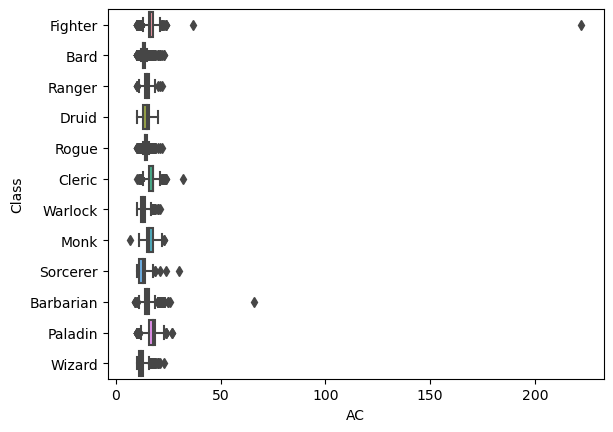

In [248]:
ac_df = df[['AC','Class']]

ax = sns.boxplot(x="AC", y="Class", data=ac_df)

PearsonRResult(statistic=0.6639485376054234, pvalue=0.0)
0.6639485376054233


C:\Users\Rhandle\AppData\Local\Temp\ipykernel_9072\3824598416.py:11: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


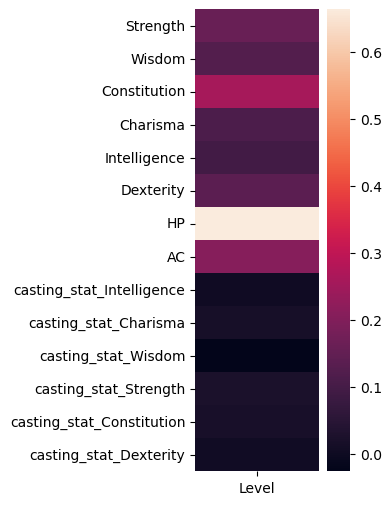

In [249]:
plt.figure(figsize=(2,6))

att_class_cols = attributes + ['HP', 'AC'] + casting_stat + ['Level']
att_class_df = df[ att_class_cols ]

att_class_corr = att_class_df.corr()
att_class_corr = att_class_corr.iloc[ 0:14, 14:]

sns.heatmap(att_class_corr)

from scipy.stats.stats import pearsonr
print(pearsonr(att_class_df['HP'], att_class_df['Level']))
print(np.corrcoef(att_class_df['HP'], att_class_df['Level'])[0, 1])

Model Planning

Binary Classifiers

In [250]:
def make_ROC_curve(fpr, tpr, roc_auc):
    fig = plt.figure(figsize=[10,7])
    ax = plt.subplot(111)

    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)
    x_ticks = np.arange(0, 11, 1)
    plt.xticks(x_ticks / 10.)
    plt.show()

In [251]:
spellcasters = ['Bard','Cleric','Druid','Sorcerer','Warlock','Wizard']

df['is_spellcaster'] = df['Class'].isin(spellcasters).astype(int)

# check balance between spellcaster and not-spellcaster
print(df.groupby('is_spellcaster').count()['AC'])

features = ['AC', 'HP per Level'] + attributes + casting_stat
X = df[ features ]
y = df['is_spellcaster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# check balance between training and test set
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

is_spellcaster
0    5650
1    4295
Name: AC, dtype: int64
is_spellcaster
0    4228
1    3230
Name: is_spellcaster, dtype: int64
is_spellcaster
0    1422
1    1065
Name: is_spellcaster, dtype: int64


Binary Logistic Regression

In [252]:
# logistic regression without CV
clf = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

print('training accuracy ', clf.score(X_train, y_train))
print('testing accuracy ', clf.score(X_test, y_test))

# logistic regression with CV
clf = LogisticRegressionCV(cv = 10, random_state=42, solver='liblinear').fit(X_train, y_train)
print('training accuracy ', clf.score(X_train, y_train))
print('testing accuracy ',clf.score(X_test, y_test))

training accuracy  0.8943416465540359
testing accuracy  0.8882187374346603
training accuracy  0.8943416465540359
testing accuracy  0.889827100924809


In [253]:
# use f1 scoring
clf = LogisticRegressionCV(cv = 10, random_state=42, solver='liblinear', scoring = 'f1').fit(X_train, y_train)
print('training f1 score: ', clf.score(X_train, y_train))
print('testing f1 score: ', clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

print('\nConfusion Matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print('')

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('TPR: ', tp / (tp+fn))
print('FPR: ', fp / (fp+tn))

training f1 score:  0.8791040196379258
testing f1 score:  0.8734995383194829

Confusion Matrix:
[[1267  155]
 [ 119  946]]

TPR:  0.888262910798122
FPR:  0.1090014064697609


probabilities of being in each class:  [[0.48899856 0.51100144]
 [0.40006713 0.59993287]
 [0.9799971  0.0200029 ]
 ...
 [0.04960188 0.95039812]
 [0.06438714 0.93561286]
 [0.1442478  0.8557522 ]]
extract probability observation is class 1 [0.51100144 0.59993287 0.0200029  ... 0.95039812 0.93561286 0.8557522 ]


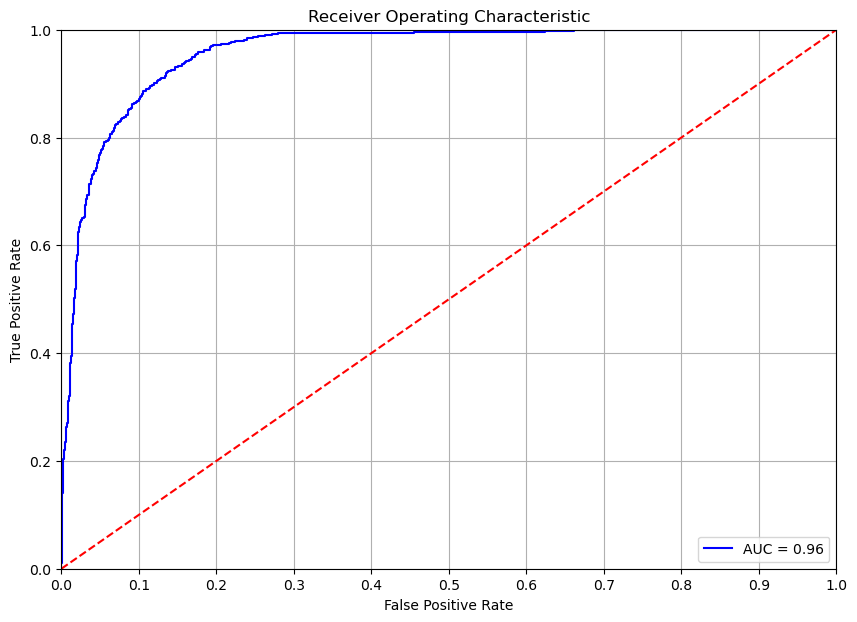

[]


In [254]:
probs = clf.predict_proba(X_test)
print('probabilities of being in each class: ', probs)

preds = probs[:,1]
print('extract probability observation is class 1', preds)

# 3 arrays with fpr, tpr, threshold for given thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

make_ROC_curve(fpr, tpr, roc_auc)

print([z for z in zip(threshold, fpr, tpr) if z[1] < 0.05 and z[2] > 0.80])

Binary Decision Tree

In [255]:
# binary decision tree
# risks: overfitting, offset with hyperparameters

# use same training / testing data
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 20)
clf = clf.fit(X_train, y_train)

print('training ACC', clf.score(X_train, y_train))
print('testing ACC', clf.score(X_test, y_test))

training ACC 0.9388576025744167
testing ACC 0.9211901889827101


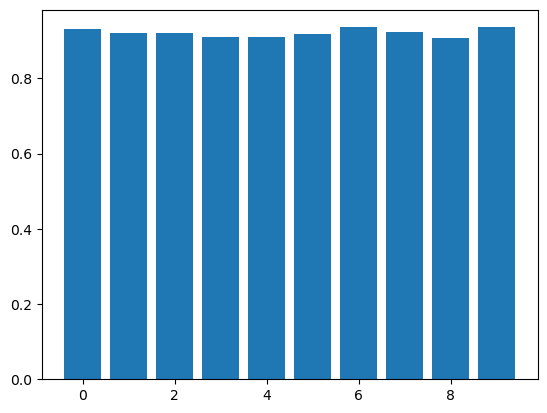

mean f1 score of 10-fold cv: 0.921, (std: 0.010)


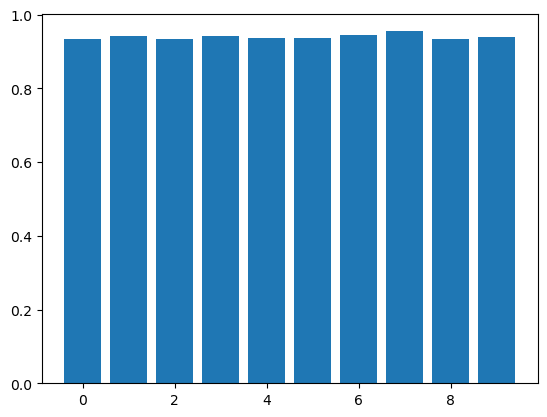

mean f1 score of 10-fold cv: 0.939, (std: 0.006)


In [256]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 20)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
plt.bar(range(len(scores)), scores)
plt.show()
print(f'mean f1 score of 10-fold cv: {scores.mean():.3f}, (std: {scores.std():.3f})')

if 0: # this takes awhile to run, change to 1 if you want to play with it
  # hyperparameter tuning with grid search
  param_grid = {"criterion": ['gini', 'entropy'],
                "max_depth": [None, 5, 10, 20],
                "min_samples_leaf": [1, 5, 10, 20],
                "min_samples_split": [2, 5, 10, 20]
                }

  dt = tree.DecisionTreeClassifier()

  grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring='f1')
  grid_search.fit(X_train, y_train)
  print('Best parameters: ', grid_search.best_params_)
  print('Resulting best score:', grid_search.best_score_)
  # result: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}

# perform 10-fold cv and print the f1 score for each fold using optimized hyperparameters
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf= 5, min_samples_split=10)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
plt.bar(range(len(scores)), scores)
plt.show()
print(f'mean f1 score of 10-fold cv: {scores.mean():.3f}, (std: {scores.std():.3f})')

In [257]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf= 5, min_samples_split=10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print('')

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('TPR: ', tp / (tp+fn))
print('FPR: ', fp / (fp+tn))

Confusion Matrix:
[[1354   68]
 [  83  982]]

TPR:  0.9220657276995305
FPR:  0.04781997187060478


In [258]:
features = ['AC', 'HP per Level'] + attributes + casting_stat

X = df[ features ]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

Class
Barbarian    657
Bard         498
Cleric       733
Druid        537
Fighter      985
Monk         533
Paladin      620
Ranger       527
Rogue        906
Sorcerer     465
Warlock      457
Wizard       540
Name: Class, dtype: int64
Class
Barbarian    225
Bard         163
Cleric       236
Druid        169
Fighter      357
Monk         159
Paladin      218
Ranger       182
Rogue        281
Sorcerer     152
Warlock      166
Wizard       179
Name: Class, dtype: int64


In [259]:
clf = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto').fit(X_train, y_train)

print('training accuracy ', clf.score(X_train, y_train))
print('testing accuracy ', clf.score(X_test, y_test))

# Accuracy measurements
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

# probabilities of being in each class
probs = clf.predict_proba(X_test)
print(probs)

# extract probability observation is class 1
preds = probs[:,1]
print(preds)

training accuracy  0.7291499061410566
testing accuracy  0.7080820265379976
[[162   0   2   0  50   0   1   0   6   1   0   3]
 [  0  86   0   0   1   0  18   0   0  39  19   0]
 [  0   0 187  39   0   1   0   9   0   0   0   0]
 [  0   0  34 109   0   0   0  26   0   0   0   0]
 [ 66   1   1   0 225  11   2   1  44   0   1   5]
 [  5   0   3   3   6 102   0  12  27   0   0   1]
 [  0   7   0   0   0   0 206   0   0   3   2   0]
 [  0   0  11  13   0   0   0 158   0   0   0   0]
 [  3   3   0   0   8  20   0   1 227   0   0  19]
 [  0  33   0   0   0   0   8   0   0  99  12   0]
 [  0  57   0   1   0   1  12   0   0  62  31   2]
 [  0   0   0   0   3   0   0   0   7   0   0 169]]
              precision    recall  f1-score   support

   Barbarian      0.686     0.720     0.703       225
        Bard      0.460     0.528     0.491       163
      Cleric      0.786     0.792     0.789       236
       Druid      0.661     0.645     0.653       169
     Fighter      0.768     0.630     0.6

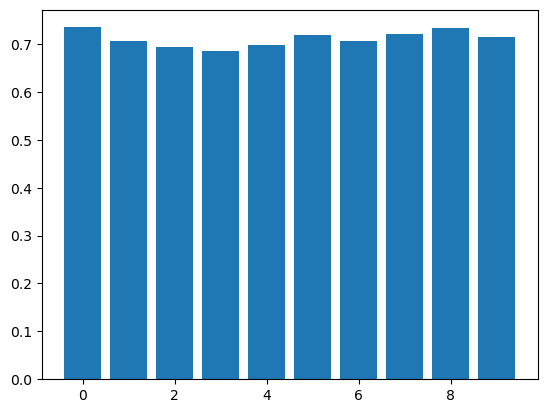

mean f1 score of 10-fold cv: 0.711, (std: 0.015)


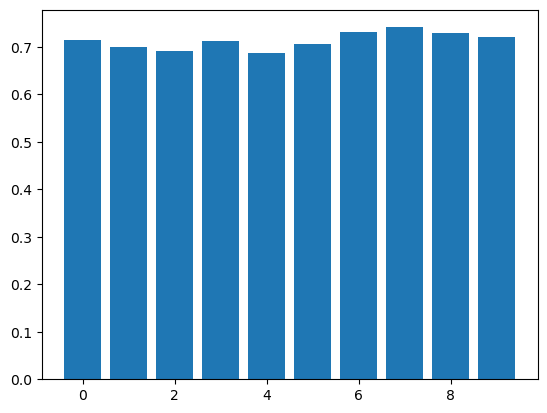

mean f1 score of 10-fold cv: 0.714, (std: 0.017)


In [260]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 20)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
plt.bar(range(len(scores)), scores)
plt.show()
print(f'mean f1 score of 10-fold cv: {scores.mean():.3f}, (std: {scores.std():.3f})')

if 0: # this takes awhile to run, change to 1 if you want to play with it
  # hyperparameter tuning with grid search
  param_grid = {"criterion": ['gini', 'entropy'],
                "max_depth": [None, 5, 10, 20],
                "min_samples_leaf": [1, 5, 10, 20],
                "min_samples_split": [2, 5, 10, 20]
                }

  dt = tree.DecisionTreeClassifier()

  grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring='f1_macro')
  grid_search.fit(X_train, y_train)
  print('Best parameters: ', grid_search.best_params_)
  print('Resulting best score:', grid_search.best_score_)
 
# perform 10-fold cv and print the f1 score for each fold using optimized hyperparameters
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=20, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
plt.bar(range(len(scores)), scores)
plt.show()
print(f'mean f1 score of 10-fold cv: {scores.mean():.3f}, (std: {scores.std():.3f})')

Multi-class Classifier

In [261]:
# new target column using the entire multiclass 
features = ['AC', 'HP per Level'] + attributes + casting_stat

X = df[ features ]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

Class
Barbarian    657
Bard         498
Cleric       733
Druid        537
Fighter      985
Monk         533
Paladin      620
Ranger       527
Rogue        906
Sorcerer     465
Warlock      457
Wizard       540
Name: Class, dtype: int64
Class
Barbarian    225
Bard         163
Cleric       236
Druid        169
Fighter      357
Monk         159
Paladin      218
Ranger       182
Rogue        281
Sorcerer     152
Warlock      166
Wizard       179
Name: Class, dtype: int64


Multi-class Logistic Regression

In [262]:
clf = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto').fit(X_train, y_train)

print('training accuracy ', clf.score(X_train, y_train))
print('testing accuracy ', clf.score(X_test, y_test))

# Accuracy measurements
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

# probabilities of being in each class
probs = clf.predict_proba(X_test)
print(probs)

# extract probability observation is class 1
preds = probs[:,1]
print(preds)

training accuracy  0.7291499061410566
testing accuracy  0.7080820265379976
[[162   0   2   0  50   0   1   0   6   1   0   3]
 [  0  86   0   0   1   0  18   0   0  39  19   0]
 [  0   0 187  39   0   1   0   9   0   0   0   0]
 [  0   0  34 109   0   0   0  26   0   0   0   0]
 [ 66   1   1   0 225  11   2   1  44   0   1   5]
 [  5   0   3   3   6 102   0  12  27   0   0   1]
 [  0   7   0   0   0   0 206   0   0   3   2   0]
 [  0   0  11  13   0   0   0 158   0   0   0   0]
 [  3   3   0   0   8  20   0   1 227   0   0  19]
 [  0  33   0   0   0   0   8   0   0  99  12   0]
 [  0  57   0   1   0   1  12   0   0  62  31   2]
 [  0   0   0   0   3   0   0   0   7   0   0 169]]
              precision    recall  f1-score   support

   Barbarian      0.686     0.720     0.703       225
        Bard      0.460     0.528     0.491       163
      Cleric      0.786     0.792     0.789       236
       Druid      0.661     0.645     0.653       169
     Fighter      0.768     0.630     0.6

Multi-class Decision Tree

In [263]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=20,random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('')
print('Success Metrics')
print(metrics.classification_report(y_test, y_pred, digits=3))

Confusion Matrix
[[176   0   1   0  43   0   1   1   1   1   0   1]
 [  1  70   0   0   0   0   6   0   0  39  47   0]
 [  0   0 177  48   0   2   0   9   0   0   0   0]
 [  0   0  25 126   0   1   0  17   0   0   0   0]
 [ 41   1   1   0 260  14   1   1  34   0   1   3]
 [  6   0   0   5  13 101   1   6  26   0   0   1]
 [  0   7   0   0   0   0 202   0   0   1   8   0]
 [  0   0  10  25   0   2   0 145   0   0   0   0]
 [  4   2   0   0  23  12   0   0 224   0   1  15]
 [  0  19   0   0   0   0   4   0   0 111  18   0]
 [  0  51   0   1   1   0   7   0   0  33  71   2]
 [  0   0   0   0   6   1   0   0  14   0   0 158]]

Success Metrics
              precision    recall  f1-score   support

   Barbarian      0.772     0.782     0.777       225
        Bard      0.467     0.429     0.447       163
      Cleric      0.827     0.750     0.787       236
       Druid      0.615     0.746     0.674       169
     Fighter      0.751     0.728     0.740       357
        Monk      0.759     

Feature Importance

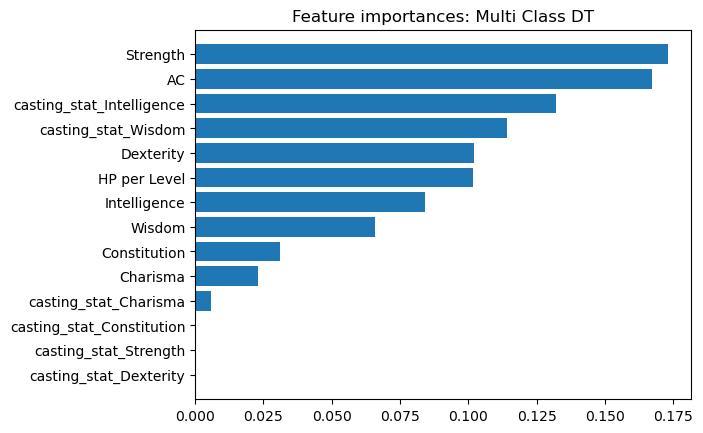

In [264]:
# feature importance for multiclass decision tree
importance = clf.feature_importances_

# combine list of features and importance weights into dataframe
importance_dt = zip(list(X_train.columns), importance)
importance_dt = set(importance_dt)
importance_dt = pd.DataFrame(importance_dt, columns = ['feature','importance'])

# sort dataframe to graph from high to low
importance_dt = importance_dt.sort_values('importance',ascending = True)
importance_dt.reset_index(drop = True)

# plot the feature weights
plt.figure()
plt.title("Feature importances: Multi Class DT")
plt.barh(range(importance_dt.shape[0]), width = importance_dt['importance'], align="center")
plt.yticks(range(importance_dt.shape[0]), importance_dt['feature'])
plt.ylim([-1, importance_dt.shape[0]])
plt.show()

Support Vector Machine
Linear SVM

In [265]:
# bring in some libraries to do scaling and svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.svm import SVC

# create classifier by first scaling the data (mean 0 sd 1) and then putting into linear SVM
# SVM does better if features are scaled as it is not scale invariant
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

[[166   0   1   0  50   0   1   1   3   0   0   3]
 [  0  88   0   0   0   1  14   0   0  42  18   0]
 [  0   0 177  50   0   0   0   9   0   0   0   0]
 [  0   0  26 119   0   0   0  24   0   0   0   0]
 [ 64   1   1   0 237  14   1   1  34   0   1   3]
 [  6   0   1   4   6 109   0   7  25   0   0   1]
 [  1   6   0   0   0   0 203   0   0   3   5   0]
 [  0   0   9  14   0   0   0 159   0   0   0   0]
 [  3   3   0   0   9  17   0   0 236   0   0  13]
 [  0  30   0   0   0   0   7   0   0 101  14   0]
 [  0  54   0   1   0   1  11   0   0  62  35   2]
 [  2   0   0   0   0   2   0   0   7   0   0 168]]
              precision    recall  f1-score   support

   Barbarian      0.686     0.738     0.711       225
        Bard      0.484     0.540     0.510       163
      Cleric      0.823     0.750     0.785       236
       Druid      0.633     0.704     0.667       169
     Fighter      0.785     0.664     0.719       357
        Monk      0.757     0.686     0.719       159
     Pal

Grid Search on SVM

In [266]:
# let's scale the data since it doesn't like the pipeline in grid search
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [267]:
# lets do a grid search instead of going through all different kernels, etc.

if 0: # this takes awhile to run, change to 1 if you want to play with it
  # hyperparameter tuning with grid search
  param_grid = {"kernel": ['linear', 'rbf','poly','sigmoid'],
                "degree": [2,3,4],
                "decision_function_shape": ['ovr','ovo']
                
                }

  clf = SVC()

  grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, scoring='f1_macro')
  grid_search.fit(X_train_scaled, y_train)
  print('Best parameters: ', grid_search.best_params_)
  print('Resulting best score:', grid_search.best_score_)

In [268]:
# now let's build with those parameters
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', degree = 2, decision_function_shape = 'ovr'))
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

[[175   0   1   0  40   1   1   1   5   0   0   1]
 [  0  99   0   0   1   0   8   0   0  30  25   0]
 [  0   0 189  41   0   0   0   6   0   0   0   0]
 [  0   0  26 120   0   0   0  23   0   0   0   0]
 [ 54   1   1   0 255  11   1   1  31   0   1   1]
 [  4   0   1   5  10 109   0   5  24   0   0   1]
 [  0   4   0   0   1   0 209   0   0   1   3   0]
 [  0   0   6  13   0   0   0 163   0   0   0   0]
 [  2   1   0   0   9  16   0   0 239   0   2  12]
 [  0  28   0   0   0   0   6   0   0  97  21   0]
 [  0  56   0   1   0   1  12   0   0  50  44   2]
 [  0   0   0   0   1   1   0   0   5   0   0 172]]
              precision    recall  f1-score   support

   Barbarian      0.745     0.778     0.761       225
        Bard      0.524     0.607     0.563       163
      Cleric      0.844     0.801     0.822       236
       Druid      0.667     0.710     0.688       169
     Fighter      0.804     0.714     0.757       357
        Monk      0.784     0.686     0.732       159
     Pal

Random Forests

In [269]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# add new spells/level feature
df['spells_per_lvl'] = df['num_spells'].divide(df['Level'])
features = ['AC', 'HP per Level', 'spells_per_lvl'] + attributes + casting_stat
X = df[features]
y = df['Class']
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.25, random_state=42)


if 0: # this takes awhile to run, change to 1 if you want to play with it
  # hyperparameter tuning with grid search
    param_grid = {
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300]
    }
    rf = RandomForestClassifier()
    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    print('Best parameters: ', grid_search.best_params_)
    print('Resulting best score:', grid_search.best_score_)

clf = RandomForestClassifier(n_estimators=300, min_samples_leaf=3, min_samples_split=8, random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('')
print('Success Metrics')
print(metrics.classification_report(y_test, y_pred, digits=3))

Confusion Matrix
[[182   0   0   0  37   1   1   1   2   0   0   1]
 [  1 114   0   0   0   0  11   0   0  15  22   0]
 [  0   0 210  23   0   0   0   3   0   0   0   0]
 [  0   0  20 135   0   0   0  14   0   0   0   0]
 [ 29   0   1   0 277  13   1   1  31   1   1   2]
 [  5   0   0   4   9 116   0   4  21   0   0   0]
 [  0   1   0   0   0   0 214   0   0   1   2   0]
 [  0   0   5  10   0   0   0 167   0   0   0   0]
 [  3   1   0   0  12   9   0   0 248   0   0   8]
 [  0  12   0   0   0   0   7   0   0 122  11   0]
 [  0  53   0   1   0   1  11   0   0  24  74   2]
 [  0   0   0   0   1   0   0   0   6   0   0 172]]

Success Metrics
              precision    recall  f1-score   support

   Barbarian      0.827     0.809     0.818       225
        Bard      0.630     0.699     0.663       163
      Cleric      0.890     0.890     0.890       236
       Druid      0.780     0.799     0.789       169
     Fighter      0.824     0.776     0.799       357
        Monk      0.829     

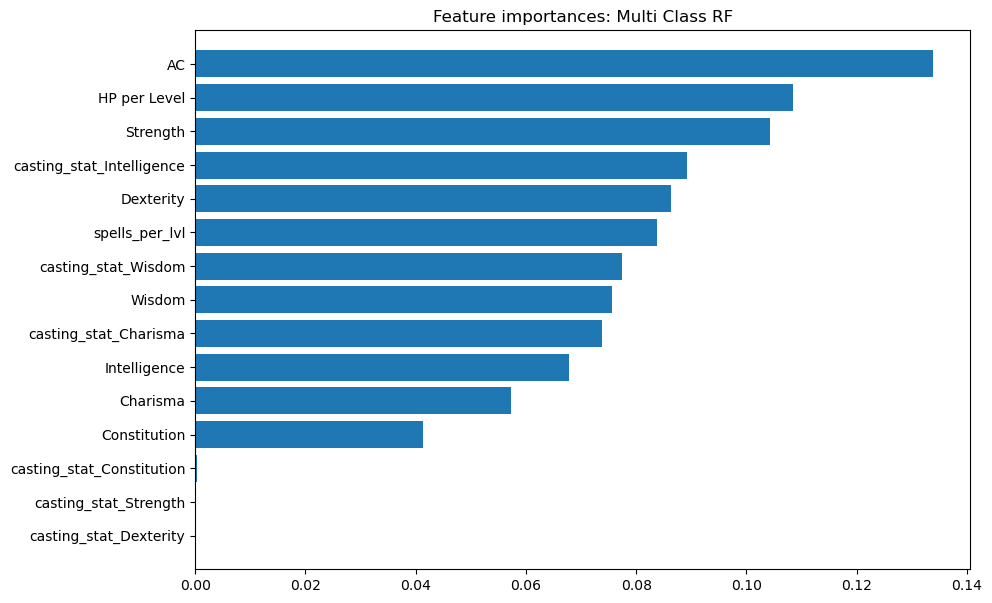

In [270]:
# feature importance for multiclass Random Forest
importance = clf.feature_importances_

# combine list of features and importance weights into dataframe
importance_rf = zip(list(X_train.columns), importance)
importance_rf = set(importance_rf)
importance_rf = pd.DataFrame(importance_rf, columns = ['feature','importance'])

# sort dataframe to graph from high to low
importance_rf = importance_rf.sort_values('importance',ascending = True)
importance_rf.reset_index(drop = True)

# plot the feature weights
fig = plt.figure(figsize=[10,7])
ax = plt.subplot(111)
plt.title("Feature importances: Multi Class RF")
plt.barh(range(importance_rf.shape[0]), width = importance_rf['importance'], align="center")
plt.yticks(range(importance_rf.shape[0]), importance_rf['feature'])
plt.ylim([-1, importance_rf.shape[0]])
plt.show()

Evaluating model on own DnD characters

In [272]:
charsheet1 = pd.DataFrame({'AC': [12],
                        'HP per Level': [18 / 3.],
                        'spells_per_lvl': [5 / 3.],
                        'Strength': [10],
                        'Dexterity': [12],
                        'Constitution': [11],
                        'Intelligence': [9],
                        'Wisdom': [15],
                        'Charisma': [17],
                        'casting_stat_Strength': [0],
                        'casting_stat_Dexterity': [0],
                        'casting_stat_Constitution': [0],
                        'casting_stat_Intelligence': [0],
                        'casting_stat_Wisdom': [0],
                        'casting_stat_Charisma': [1]})

# Ensure the feature names are in the same order as during fit
charsheet1 = charsheet1[X_train.columns]

print(clf.predict(charsheet1))

['Warlock']
